L1 Norm Optimization:
Iteration 1: Objective = 0.2967141530112327
Iteration 2: Objective = 0.0967141530112327
Iteration 3: Objective = 0.0
Iteration 4: Objective = 0.0


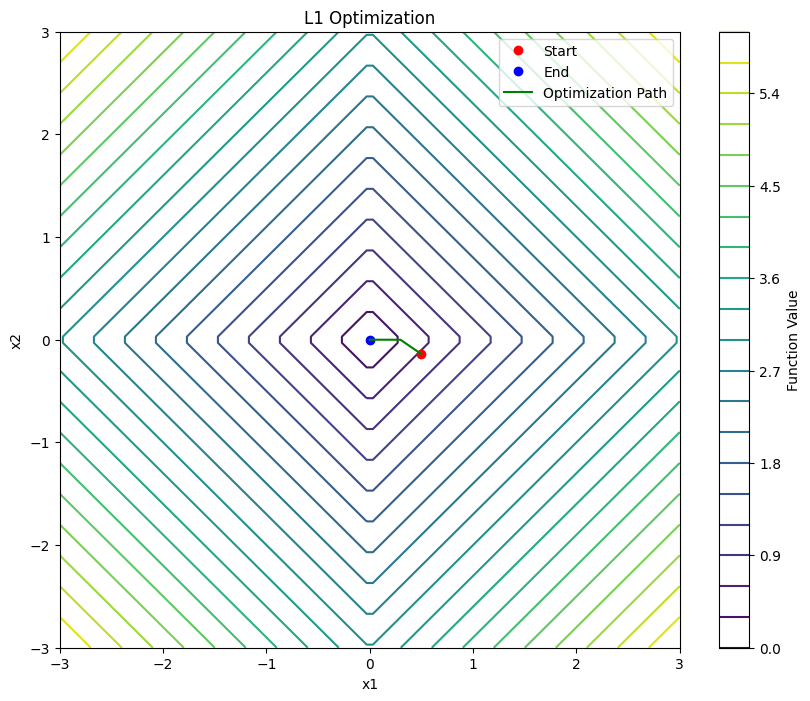

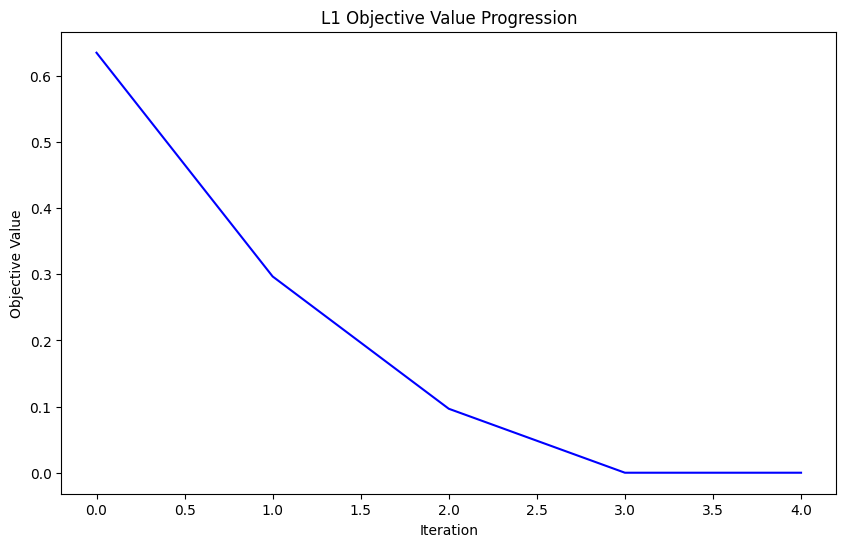

L2 Norm Optimization:
Iteration 1: Objective = 0.14061062705720187
Iteration 2: Objective = 0.07437256307157784
Iteration 3: Objective = 0.03933755402133043
Iteration 4: Objective = 0.020806640143513612
Iteration 5: Objective = 0.011005165034585712
Iteration 6: Objective = 0.005820913737301533
Iteration 7: Objective = 0.003078830406506595
Iteration 8: Objective = 0.001628472281127455
Iteration 9: Objective = 0.0008613407106789843
Iteration 10: Objective = 0.00045558516928475207
Iteration 11: Objective = 0.00024097066805143906
Iteration 12: Objective = 0.00012745555996109171
Iteration 13: Objective = 6.741451105380056e-05
Iteration 14: Objective = 3.5657262044985416e-05
Iteration 15: Objective = 1.8860039428752613e-05
Iteration 16: Objective = 9.975558044960056e-06
Iteration 17: Objective = 5.2763282221276325e-06
Iteration 18: Objective = 2.7907851753402346e-06
Iteration 19: Objective = 1.4761177786923553e-06
Iteration 20: Objective = 7.807565110438902e-07
Iteration 21: Objective = 4.12

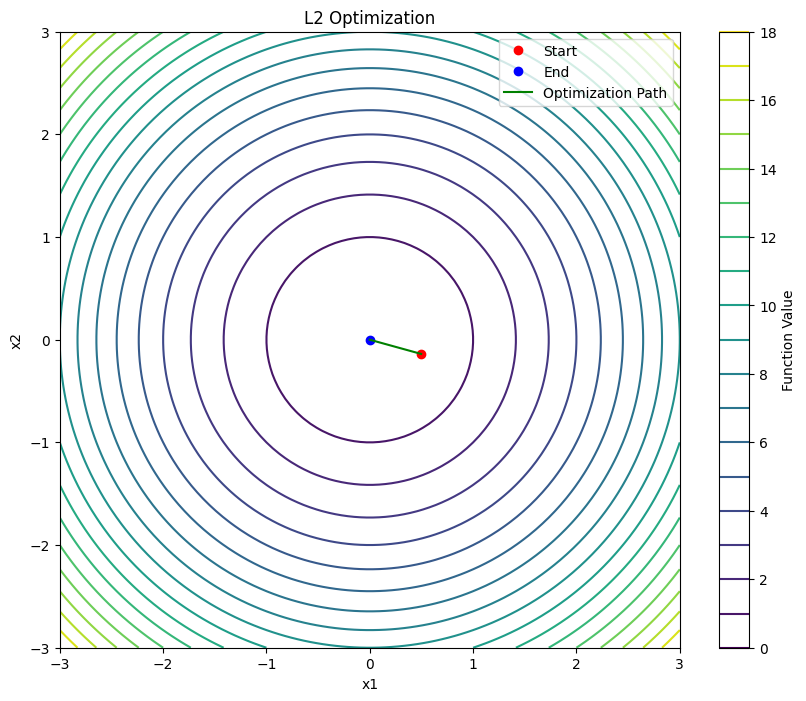

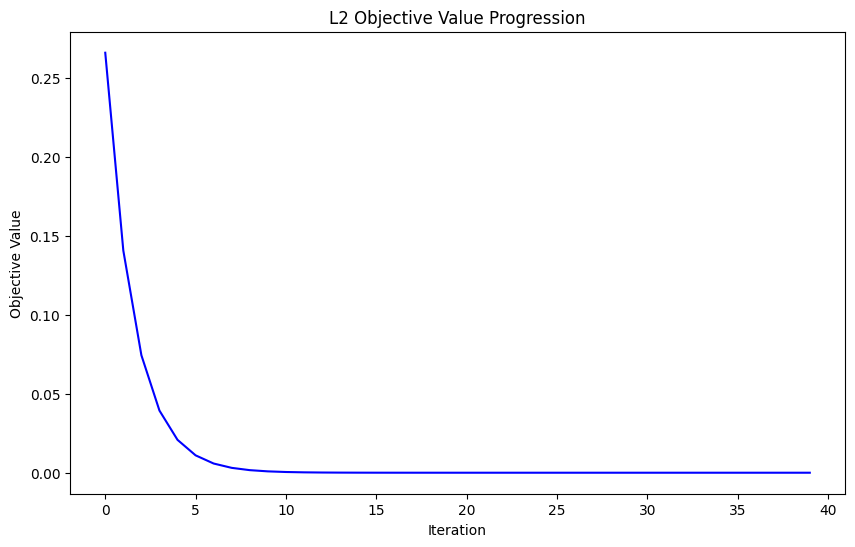

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp

def f(x):
    return np.sum(np.abs(x))

def prox_l1(x, gamma):
    return np.sign(x) * np.maximum(0, np.abs(x) - gamma)

def prox_l2(x, gamma):
    return x / (1 + gamma)

def prox_elastic_net(x, lambda_, alpha):
    threshold = lambda_ * alpha
    shrinkage_factor = 1 + lambda_ * (1 - alpha)
    prox_result = np.sign(x) * np.maximum(np.abs(x) - threshold, 0) / shrinkage_factor
    return prox_result

def prox_nuclear_norm(x, gamma):
    U, S, Vt = np.linalg.svd(x, full_matrices=False)
    S_shrunk = np.maximum(S - gamma, 0)
    return U @ np.diag(S_shrunk) @ Vt

def grad_l1(x):
    return np.sign(x)

def grad_l2(x):
    return 2 * x

def grad_quadratic(x):
    return 2 * x

def proximal_gradient_descent(
    x,
    gamma,
    n_iters,
    prox_func,
    grad_func,
    objective_func=None,
    verbose=False
):

    history = [x.copy()]
    objective_values = [objective_func(x) if objective_func else None]

    for i in range(n_iters):
        x_prev = x.copy()
        grad = grad_func(x)
        x = prox_func(x - gamma * grad, gamma)

        history.append(x.copy())

        if objective_func:
            objective_values.append(objective_func(x))

        if verbose and objective_func:
            print(f"Iteration {i+1}: Objective = {objective_values[-1]}")

        if np.linalg.norm(x - x_prev) < 1e-6:
            break

    return x, history, objective_values

def plot_contours(func, x_range, y_range, title="Contour Plot"):

    X, Y = np.meshgrid(x_range, y_range)
    Z = np.vectorize(lambda x, y: func(np.array([x, y])))(X, Y)

    plt.figure(figsize=(10, 8))
    plt.contour(X, Y, Z, levels=20, cmap="viridis")
    plt.title(title)
    plt.colorbar(label='Function Value')
    plt.xlabel("x1")
    plt.ylabel("x2")

def plot_optimization_process(
    initial_x,
    gamma,
    n_iters,
    prox_func,
    grad_func,
    func,
    func_name="Objective Function",
):

    x_range = np.linspace(-3, 3, 100)
    y_range = np.linspace(-3, 3, 100)

    plot_contours(func, x_range, y_range, f"{func_name} Optimization")

    optimized_x, history, obj_values = proximal_gradient_descent(
        initial_x, gamma, n_iters, prox_func, grad_func, func, verbose=True
    )

    history = np.array(history)

    plt.plot(initial_x[0], initial_x[1], "ro", label="Start")
    plt.plot(optimized_x[0], optimized_x[1], "bo", label="End")
    plt.plot(history[:, 0], history[:, 1], "g-", label="Optimization Path")
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(obj_values, 'b-')
    plt.title(f"{func_name} Objective Value Progression")
    plt.xlabel("Iteration")
    plt.ylabel("Objective Value")
    plt.show()

def main():
    np.random.seed(42)

    x0 = np.random.randn(2)
    gamma = 0.1
    n_iters = 100

    print("L1 Norm Optimization:")
    plot_optimization_process(
        x0,
        gamma,
        n_iters,
        prox_l1,
        lambda x: np.sign(x),
        lambda x: np.sum(np.abs(x)),
        "L1",
    )

    print("L2 Norm Optimization:")
    plot_optimization_process(
        x0,
        gamma,
        n_iters,
        prox_l2,
        grad_l2,
        lambda x: np.sum(x**2),
        "L2",
    )

    # def elastic_net_objective(x, lambda_=0.1, alpha=0.5):
    #     return np.sum(x**2) + lambda_ * alpha * np.sum(np.abs(x)) + lambda_ * (1-alpha) * np.sum(x**2)

    # print("Elastic Net Regularization:")
    # plot_optimization_process(
    #     x0,
    #     gamma,
    #     n_iters,
    #     lambda x, gamma: prox_elastic_net(x, lambda_=0.1, alpha=0.5),
    #     grad_quadratic,
    #     lambda x: elastic_net_objective(x),
    #     "Elastic Net",
    # )

if __name__ == "__main__":
    main()